In [1]:
import time
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import joblib
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report



In [2]:
# Importing  dataset using pandas
df = pd.read_csv("user_behavior_dataset.csv")


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

In [5]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [6]:
df.describe()

User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min                 302.000000                 10.000000           102.000000   
25%                 722.250000                 26.000000           373.000000   
50%                1502.500000                 49.000000           823.500000   
75%                2229.500000                 74.000000          1341.000000   
max                2993.000000                 99.000000          2497.000000   

              Age  User Behavior Class  
count  700.000000           700.000000  
mean    38.482857             2.990000  
std     12.012916             1.401476  
min     18.000000             1.000000  
25%     28.000000             2.000000  
50%     38.000000             3.000000  
75%     49.000000             4.000000  
max     59.000000             5.000000

In [7]:
df.shape

(700, 11)

In [8]:
# Missing values check
df.isnull().sum()


User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Descriptive statistics

In [14]:

df['Number of Apps Installed'].agg(['mean', 'median', 'min', 'max'])


mean      50.681429
median    49.000000
min       10.000000
max       99.000000
Name: Number of Apps Installed, dtype: float64

The average user has around 50 apps installed, with a median of 49, indicating a fairly normal distribution.The range is from 10 to 99 apps.

In [15]:
df['App Usage Time (min/day)'].agg(['mean', 'median', 'min', 'max'])


mean      271.128571
median    227.500000
min        30.000000
max       598.000000
Name: App Usage Time (min/day), dtype: float64

Users spend an average of 271 minutes (4.5 hours) per day using apps, but the median is 227.5 minutes, suggesting some heavy users are skewing the mean.
The minimum usage is 30 minutes, while the maximum is 598 minutes (almost 10 hours!).


In [16]:
df['Screen On Time (hours/day)'].agg(['mean', 'median', 'min', 'max'])


mean       5.272714
median     4.900000
min        1.000000
max       12.000000
Name: Screen On Time (hours/day), dtype: float64

On average, people spend 5.27 hours per day on their screens, with a median of 4.9 hours.
Some users are as low as 1 hour/day, while heavy users reach 12 hours/day.


In [17]:
df['Battery Drain (mAh/day)'].agg(['mean', 'median', 'min', 'max'])


mean      1525.158571
median    1502.500000
min        302.000000
max       2993.000000
Name: Battery Drain (mAh/day), dtype: float64

The average battery consumption is 1525 mAh/day, but the median is 1502.5 mAh/day, suggesting relatively balanced usage.
Some users only drain 302 mAh/day, while high users consume 2993 mAh/day.



In [18]:
df['Data Usage (MB/day)'].agg(['mean', 'median', 'min', 'max'])


mean       929.742857
median     823.500000
min        102.000000
max       2497.000000
Name: Data Usage (MB/day), dtype: float64

The average daily data consumption is 929.74 MB, but the median is 823.5 MB, indicating a few high data consumers.
Minimum usage is 102 MB/day, while some use up to 2.5 GB/day.

In [19]:
df['Age'].agg(['mean', 'median', 'min', 'max'])


mean      38.482857
median    38.000000
min       18.000000
max       59.000000
Name: Age, dtype: float64

The average age of users is 38.48 years, with a median of 38 years.
The youngest users are 18, while the oldest are 59.


**Data Visualization**

Overall distribution of device model

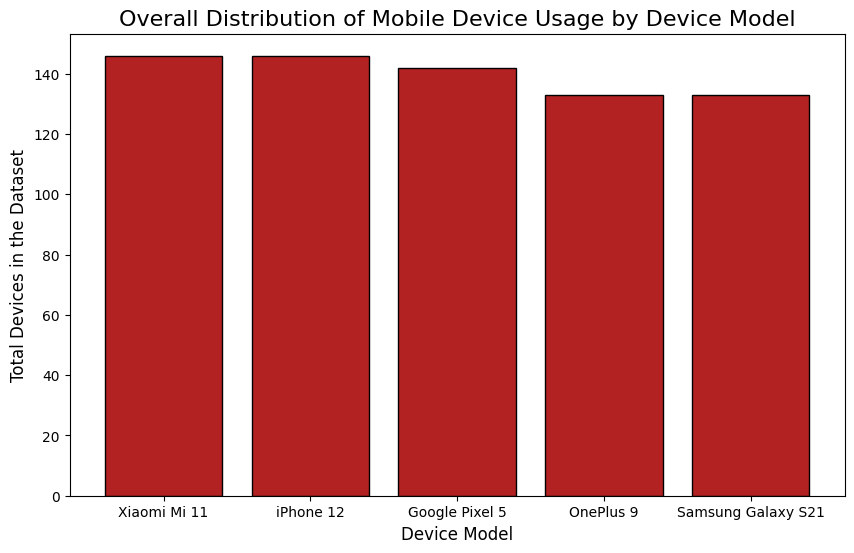

In [20]:
device_model_counts = df['Device Model'].value_counts()
device_model_counts

plt.figure(figsize=(10,6))
plt.bar(device_model_counts.index, device_model_counts.values, color='firebrick', edgecolor='black')
plt.title('Overall Distribution of Mobile Device Usage by Device Model', fontsize=16)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Total Devices in the Dataset', fontsize=12)
plt.show()

Overall distribution of Operating system counts

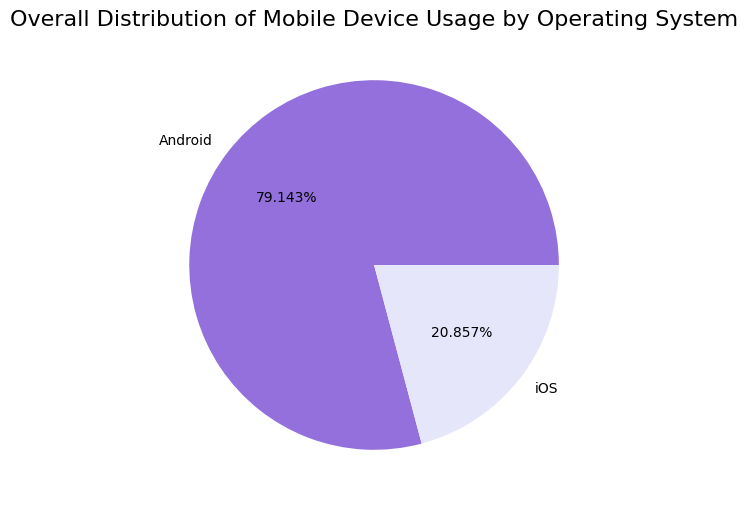

In [21]:

OS_counts = df['Operating System'].value_counts()
OS_counts

Android_counts = 554
iOS_counts = 146

index_values = [Android_counts, iOS_counts]
index_labels = ['Android', 'iOS']

colors = ['#9370DB','#E6E6FA']
plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.3f%%',colors=colors)
plt.title('Overall Distribution of Mobile Device Usage by Operating System', fontsize=16)
plt.show()

Overall distribution of GENDER

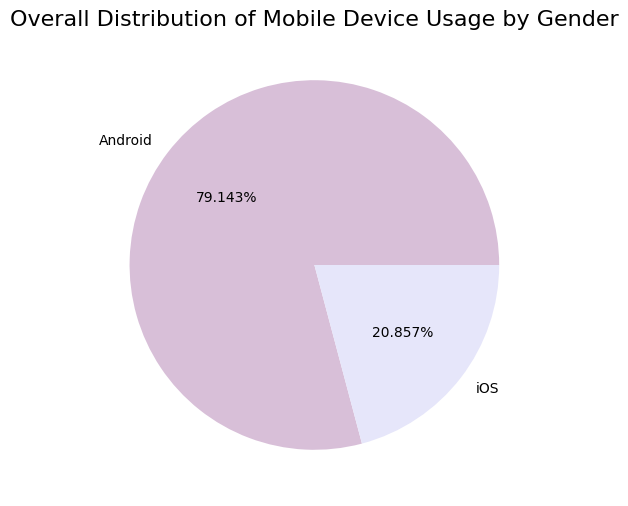

In [22]:
Male_counts = 364
Female_counts = 336

index_values1 = [Male_counts, Female_counts]
index_labels1 = ['Male', 'Female']

colors1 = ['#D8BFD8', '#E6E6FA']  # Different shades of purple
plt.figure(figsize=(10, 6))
plt.pie(index_values, labels=index_labels, autopct='%2.3f%%', colors=colors1)
plt.title('Overall Distribution of Mobile Device Usage by Gender', fontsize=16)
plt.show()

Overall distribution of  User Behavior class

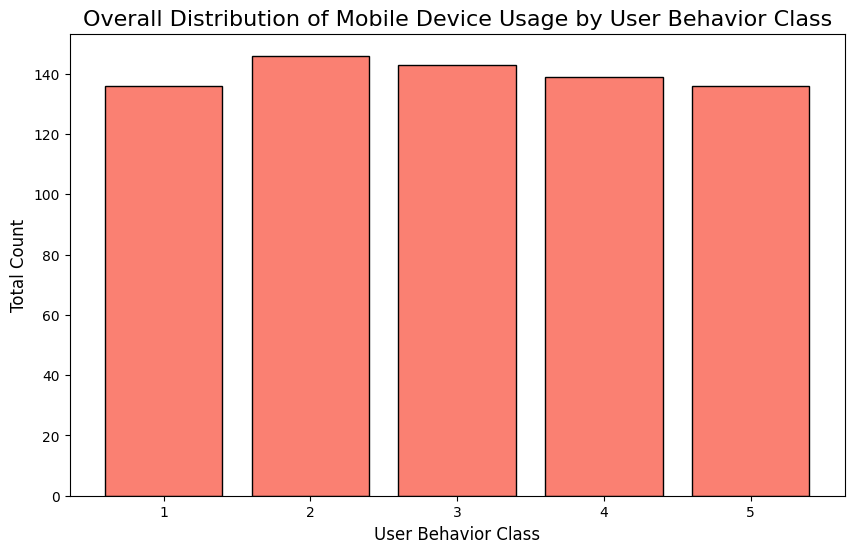

In [23]:
user_behavior_class_counts = df['User Behavior Class'].value_counts()
user_behavior_class_counts

plt.figure(figsize=(10,6))
plt.bar(user_behavior_class_counts.index, user_behavior_class_counts.values, color='salmon', edgecolor='black')
plt.title('Overall Distribution of Mobile Device Usage by User Behavior Class', fontsize=16)
plt.xlabel('User Behavior Class', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.show()


Distribution of Screen time

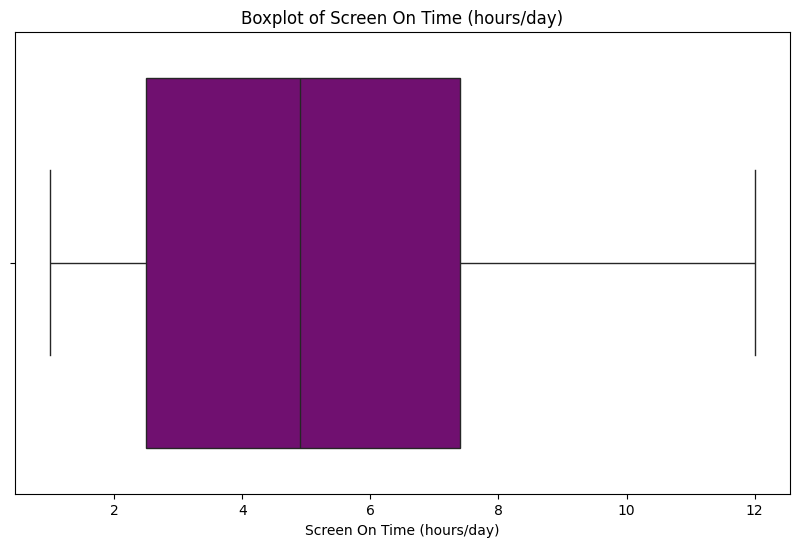

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='purple')
plt.title('Boxplot of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.show()

Distribution of App Usage Time

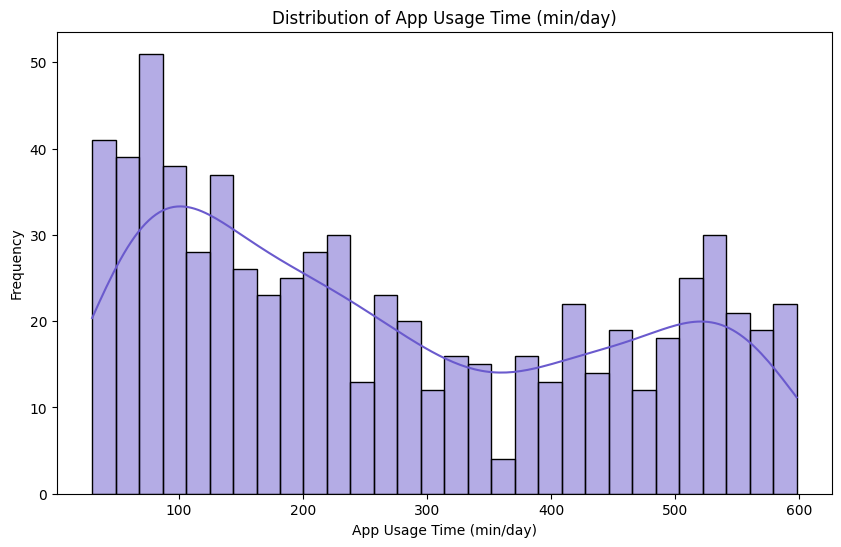

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='slateblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

 Distribution of Users by Number od Apps installed


<ipython-input-26-7c635cdfc757>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Number of Apps Installed', data=df,palette='Wistia')


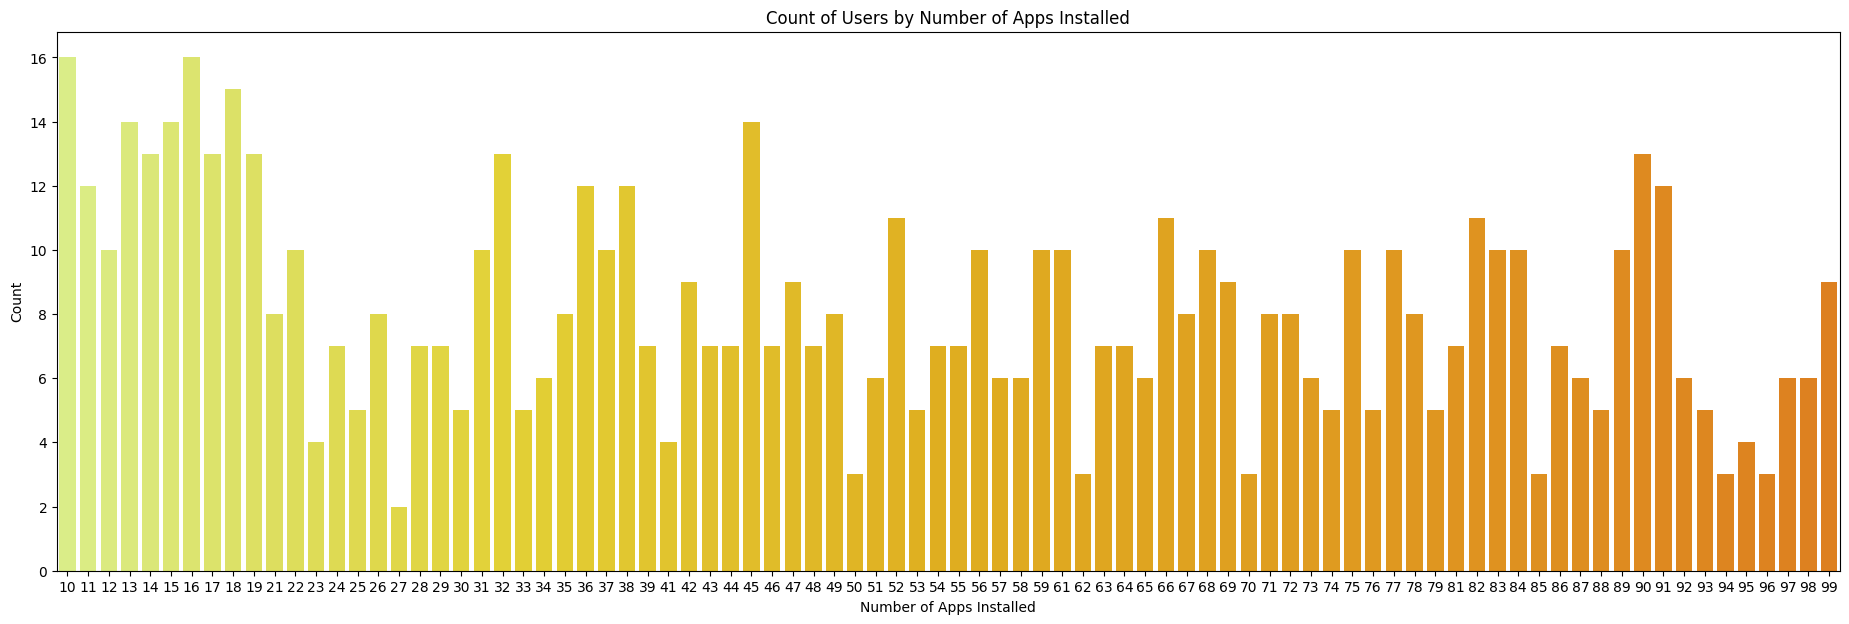

In [26]:
plt.figure(figsize=(23, 7))
sns.countplot(x='Number of Apps Installed', data=df,palette='Wistia')
plt.title('Count of Users by Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Count')
plt.show()

KDE Plot of Battery Drain


<ipython-input-27-a486b355f485>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='yellowgreen')


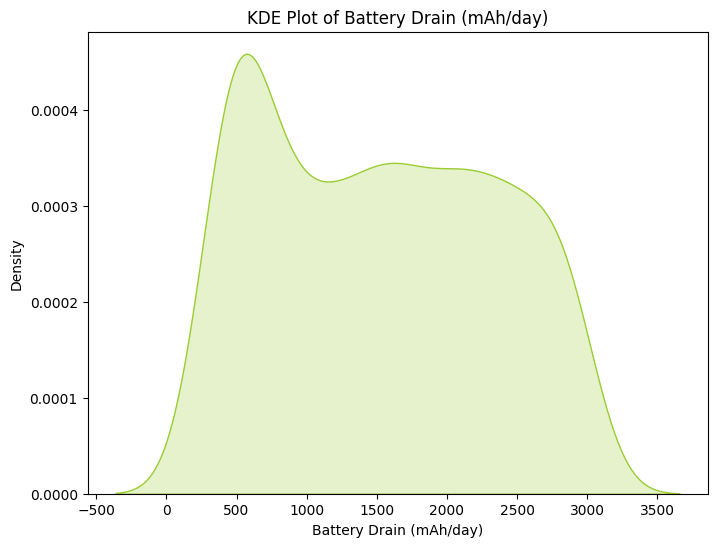

In [27]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='yellowgreen')
plt.title('KDE Plot of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()

 Distribution Of Data Usage

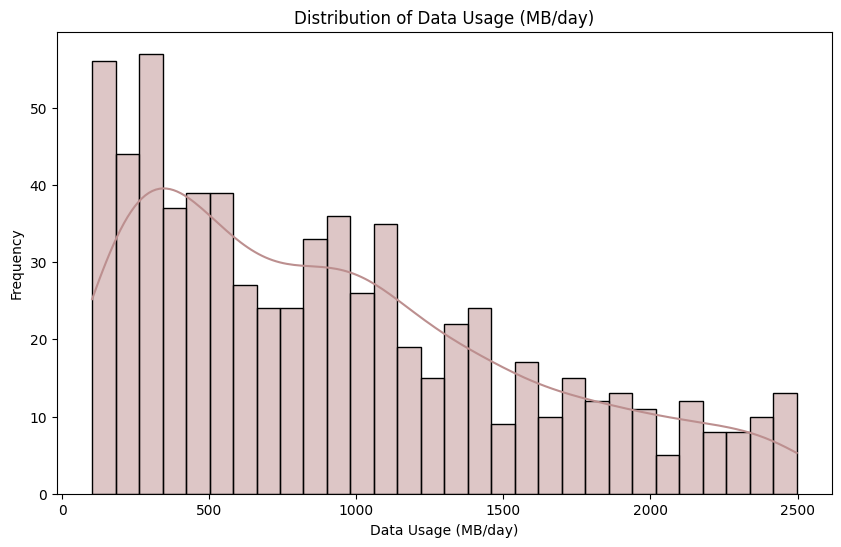

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, color='rosybrown', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

Battery Drain VS Screen Time

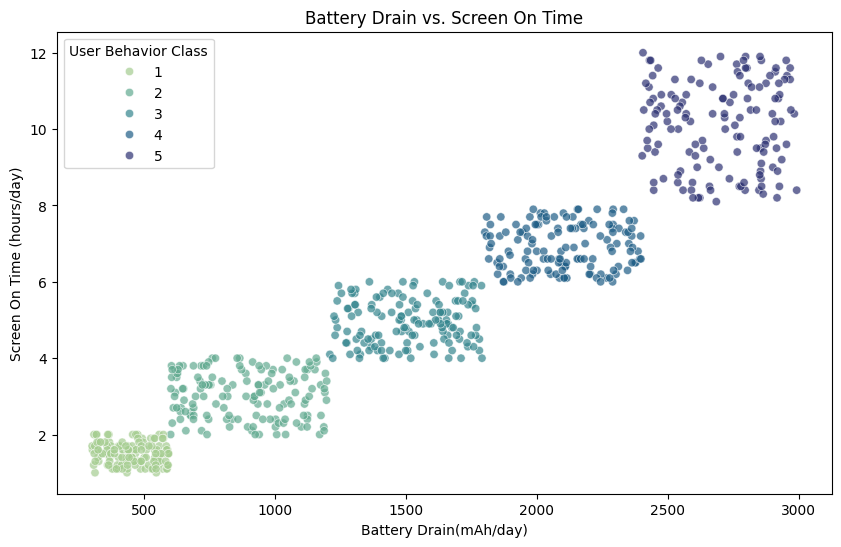

In [29]:

df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Battery Drain (mAh/day)',
    y='Screen On Time (hours/day)',
    hue='User Behavior Class',
    palette='crest',
    alpha=0.7
)
plt.title('Battery Drain vs. Screen On Time')
plt.xlabel('Battery Drain(mAh/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

App Usage Time VS Data Usage

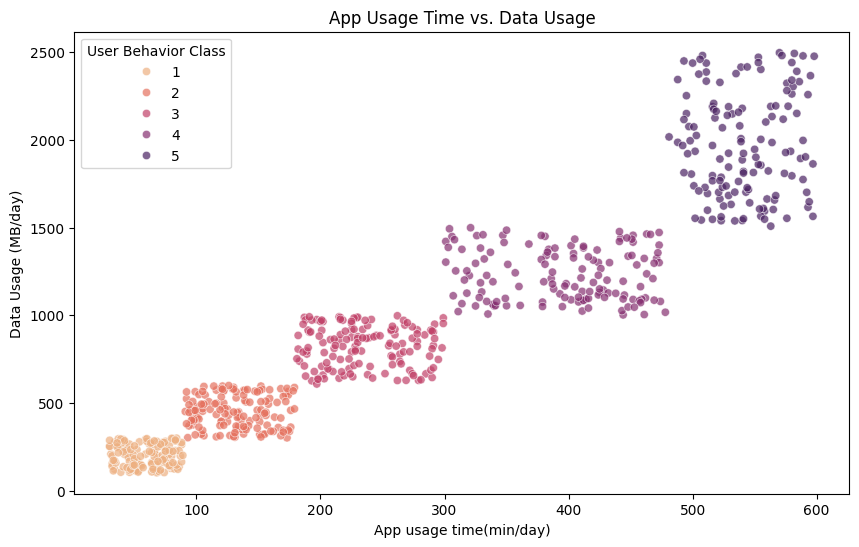

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='App Usage Time (min/day)', y='Data Usage (MB/day)', hue='User Behavior Class', palette='flare', alpha=0.7)
plt.title('App Usage Time vs. Data Usage')
plt.xlabel('App usage time(min/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

Battery Drain and App usage time


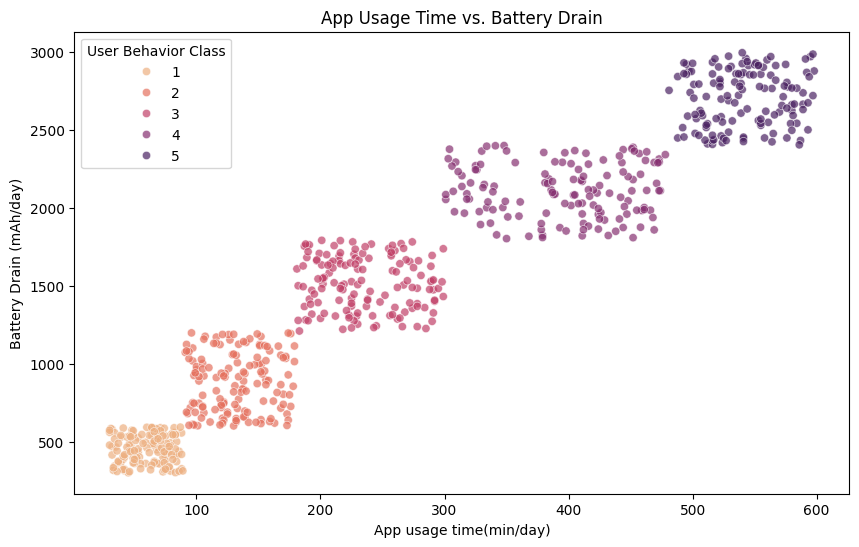

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', hue='User Behavior Class', palette='flare', alpha=0.7)
plt.title('App Usage Time vs. Battery Drain')
plt.xlabel('App usage time(min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

Number of Apps installed VS App usage time

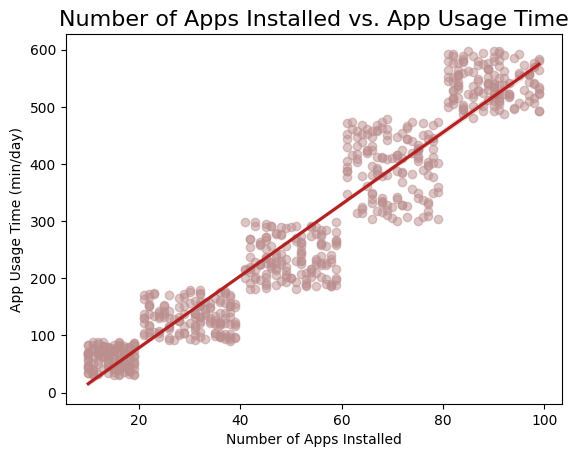

In [32]:
sns.regplot(
    x='Number of Apps Installed',
    y='App Usage Time (min/day)',
    data=df,
    scatter_kws={'alpha': 0.5, 'color': 'rosybrown'},  # Scatter points in rosybrown
    line_kws={'color': 'firebrick'}  # Regression line in rosybrown
)

plt.title('Number of Apps Installed vs. App Usage Time', fontsize=16)
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()

App Usage time by operating System

<ipython-input-33-159020310527>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='icefire')


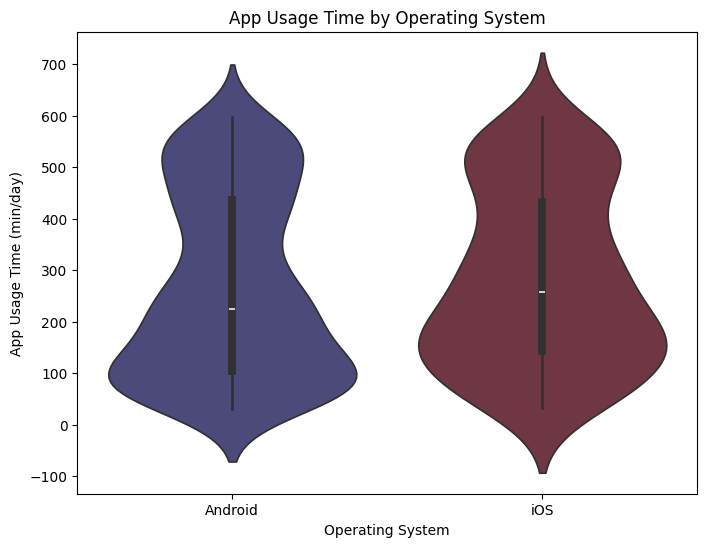

In [33]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='icefire')
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()

Data Usage by User Behavior Class

<ipython-input-34-bc82659198cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='mako')


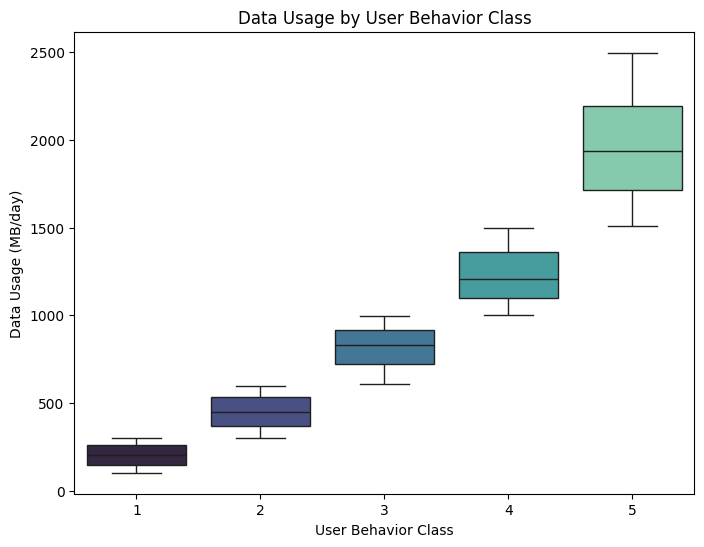

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='mako')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()

User Behavior Class by Operating System


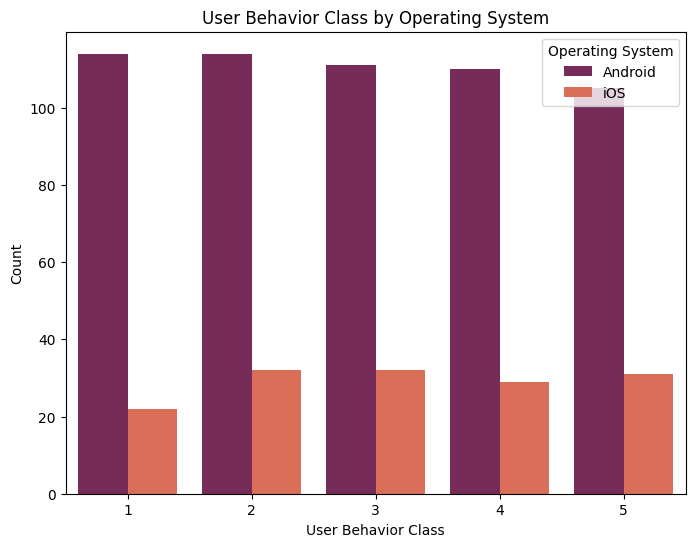

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Operating System', data=df, palette='rocket')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()

Correlation Heatmap


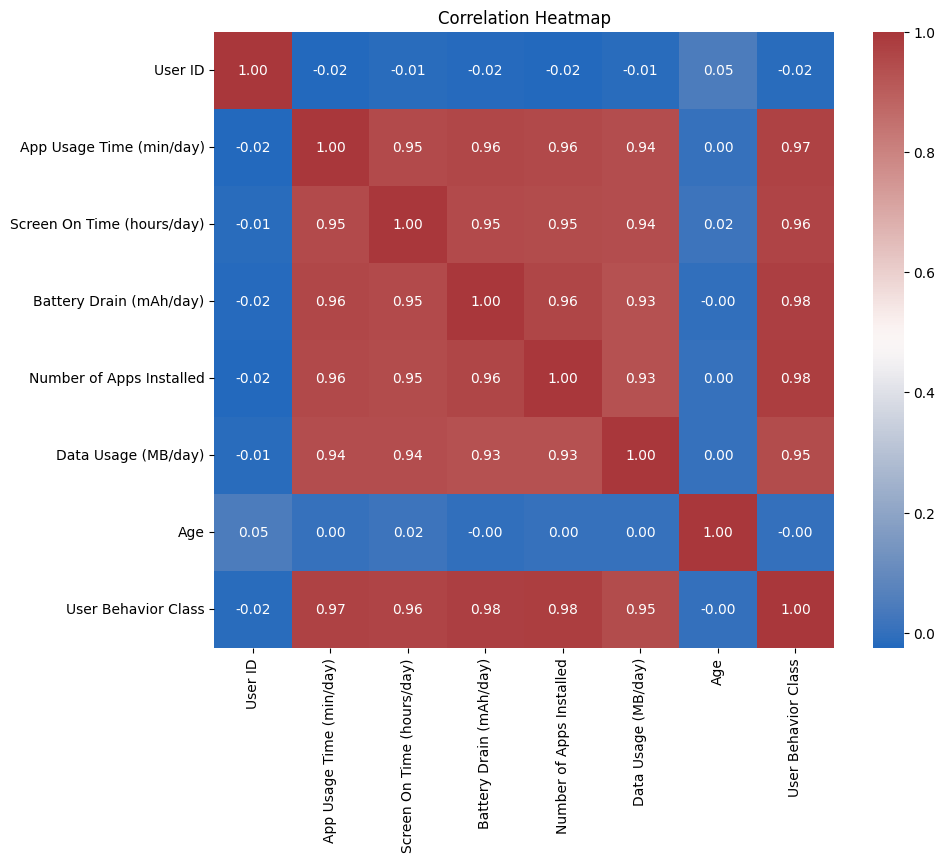

In [36]:
plt.figure(figsize=(10,8))
corr_matrix = df.drop(columns=['Operating System', 'Device Model', 'Gender']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Pairplot

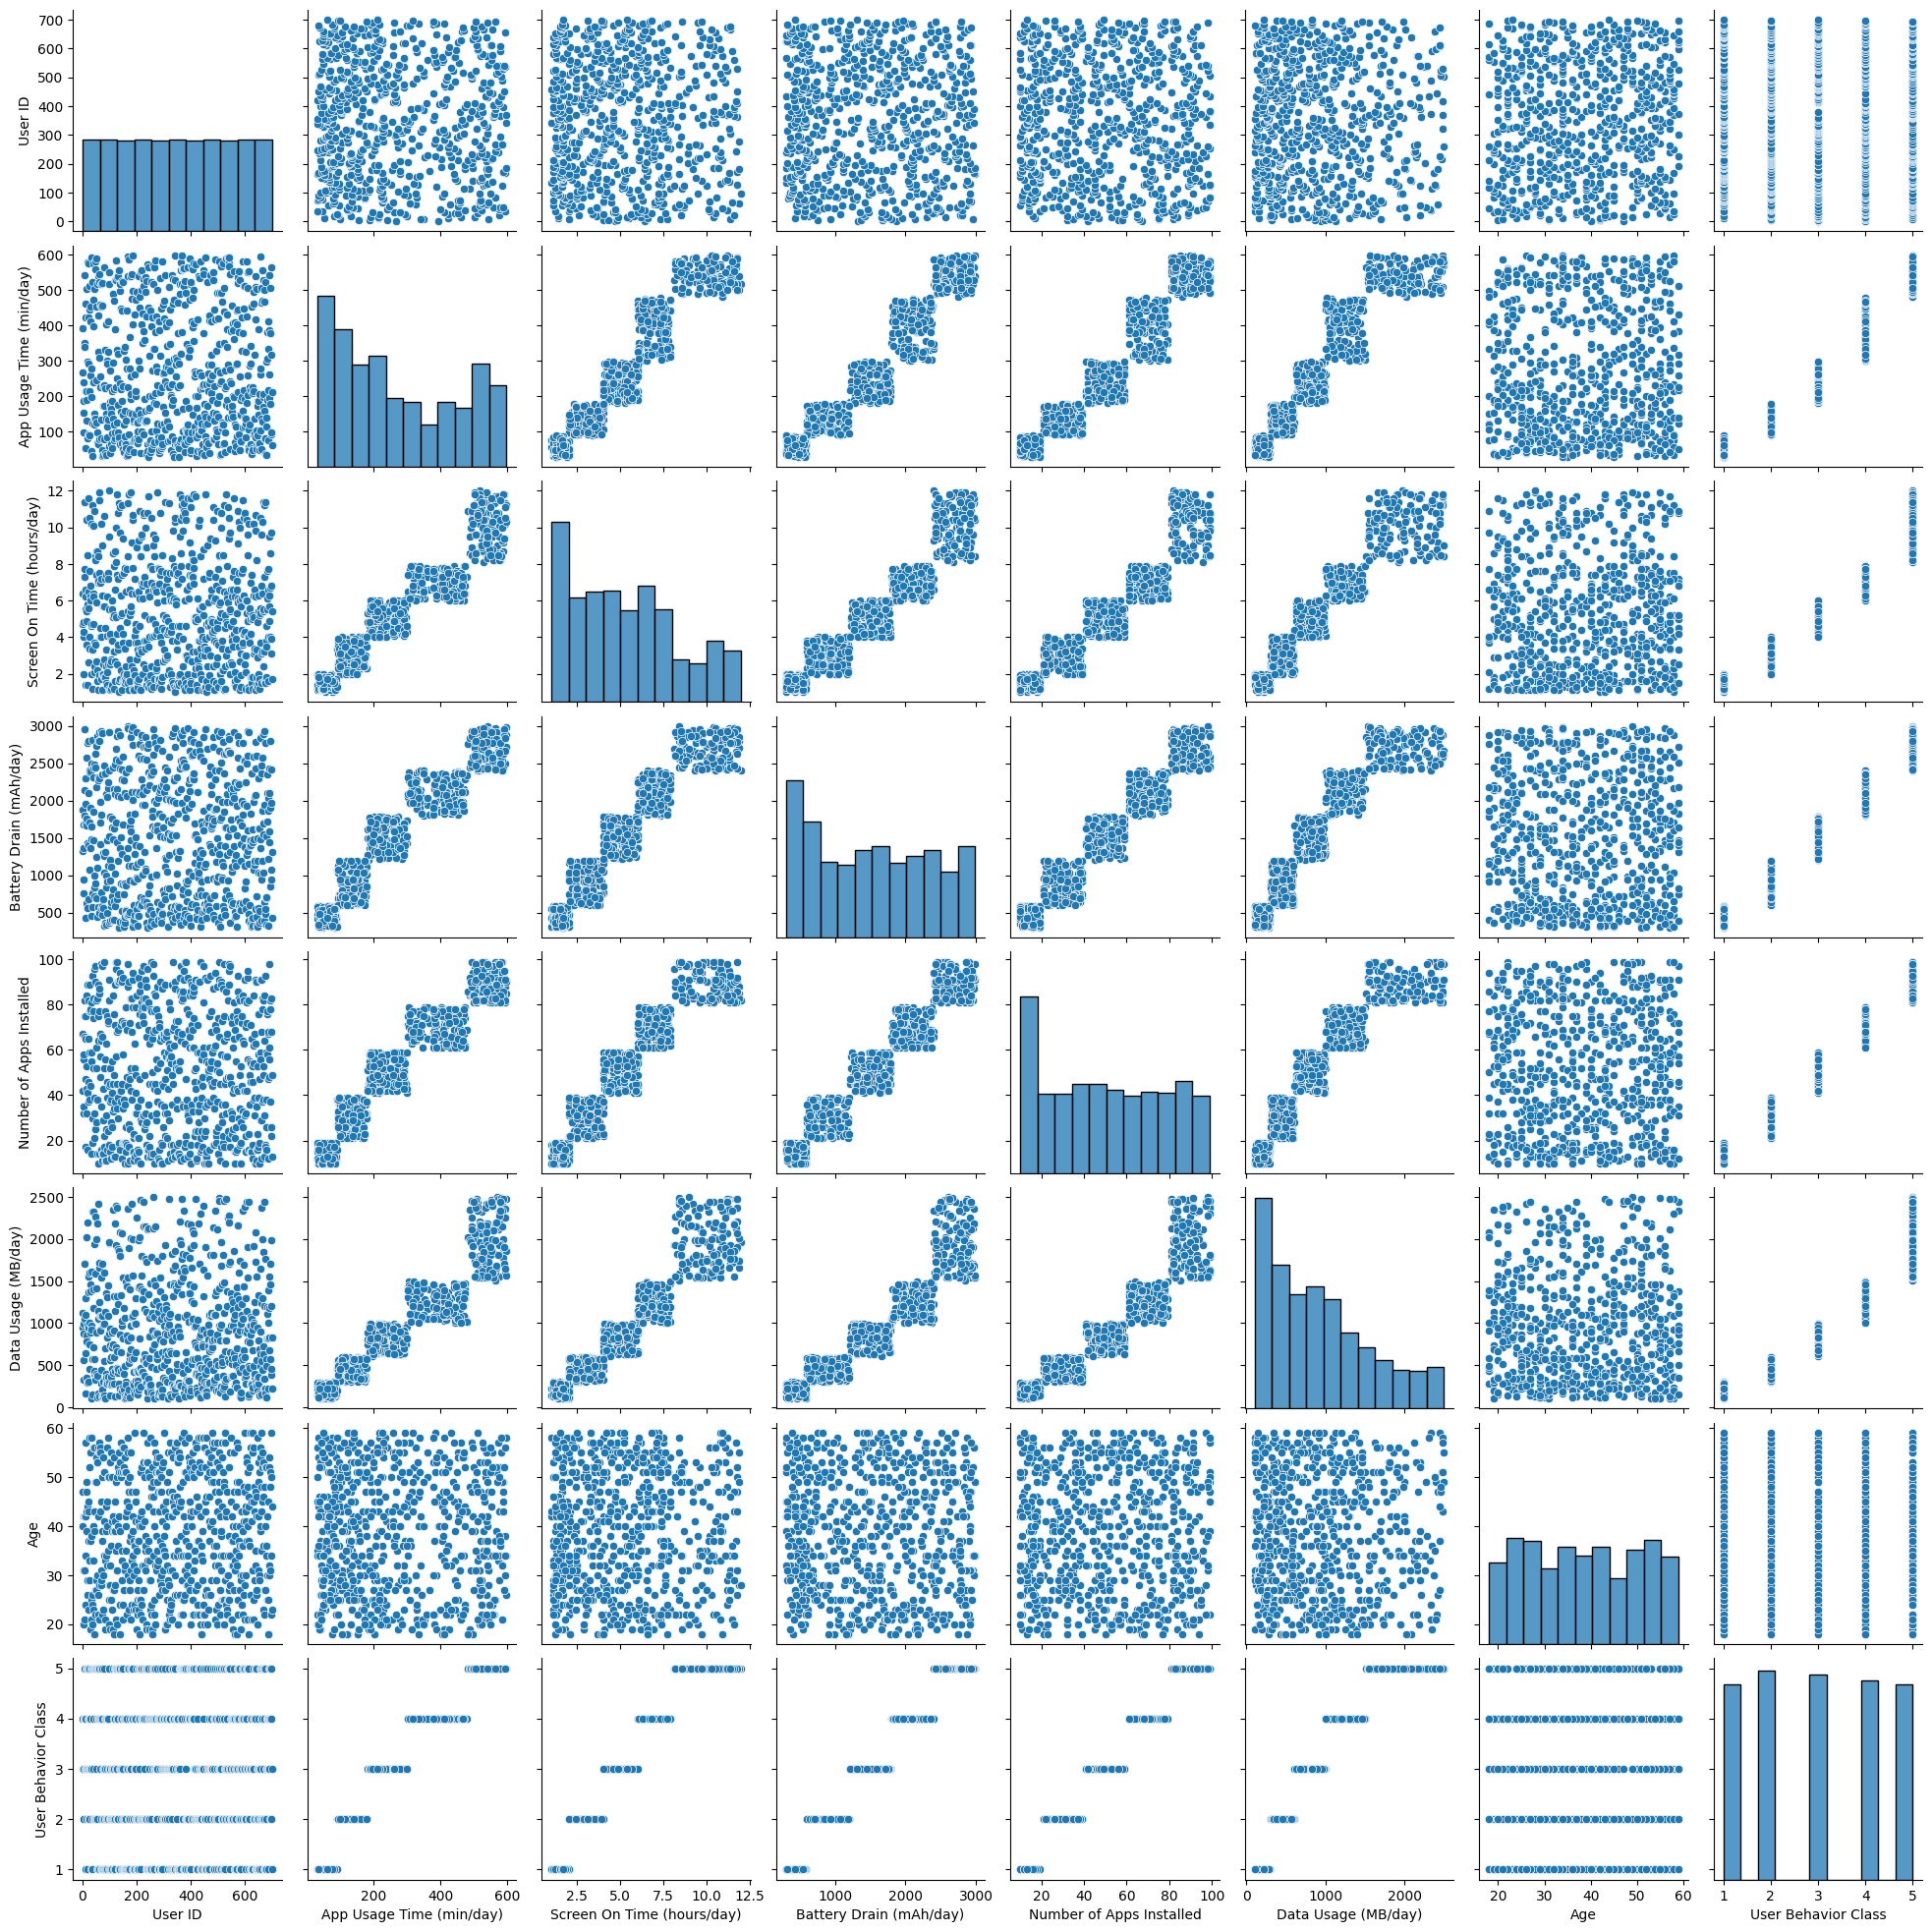

In [37]:
sns.pairplot(df)
plt.show()


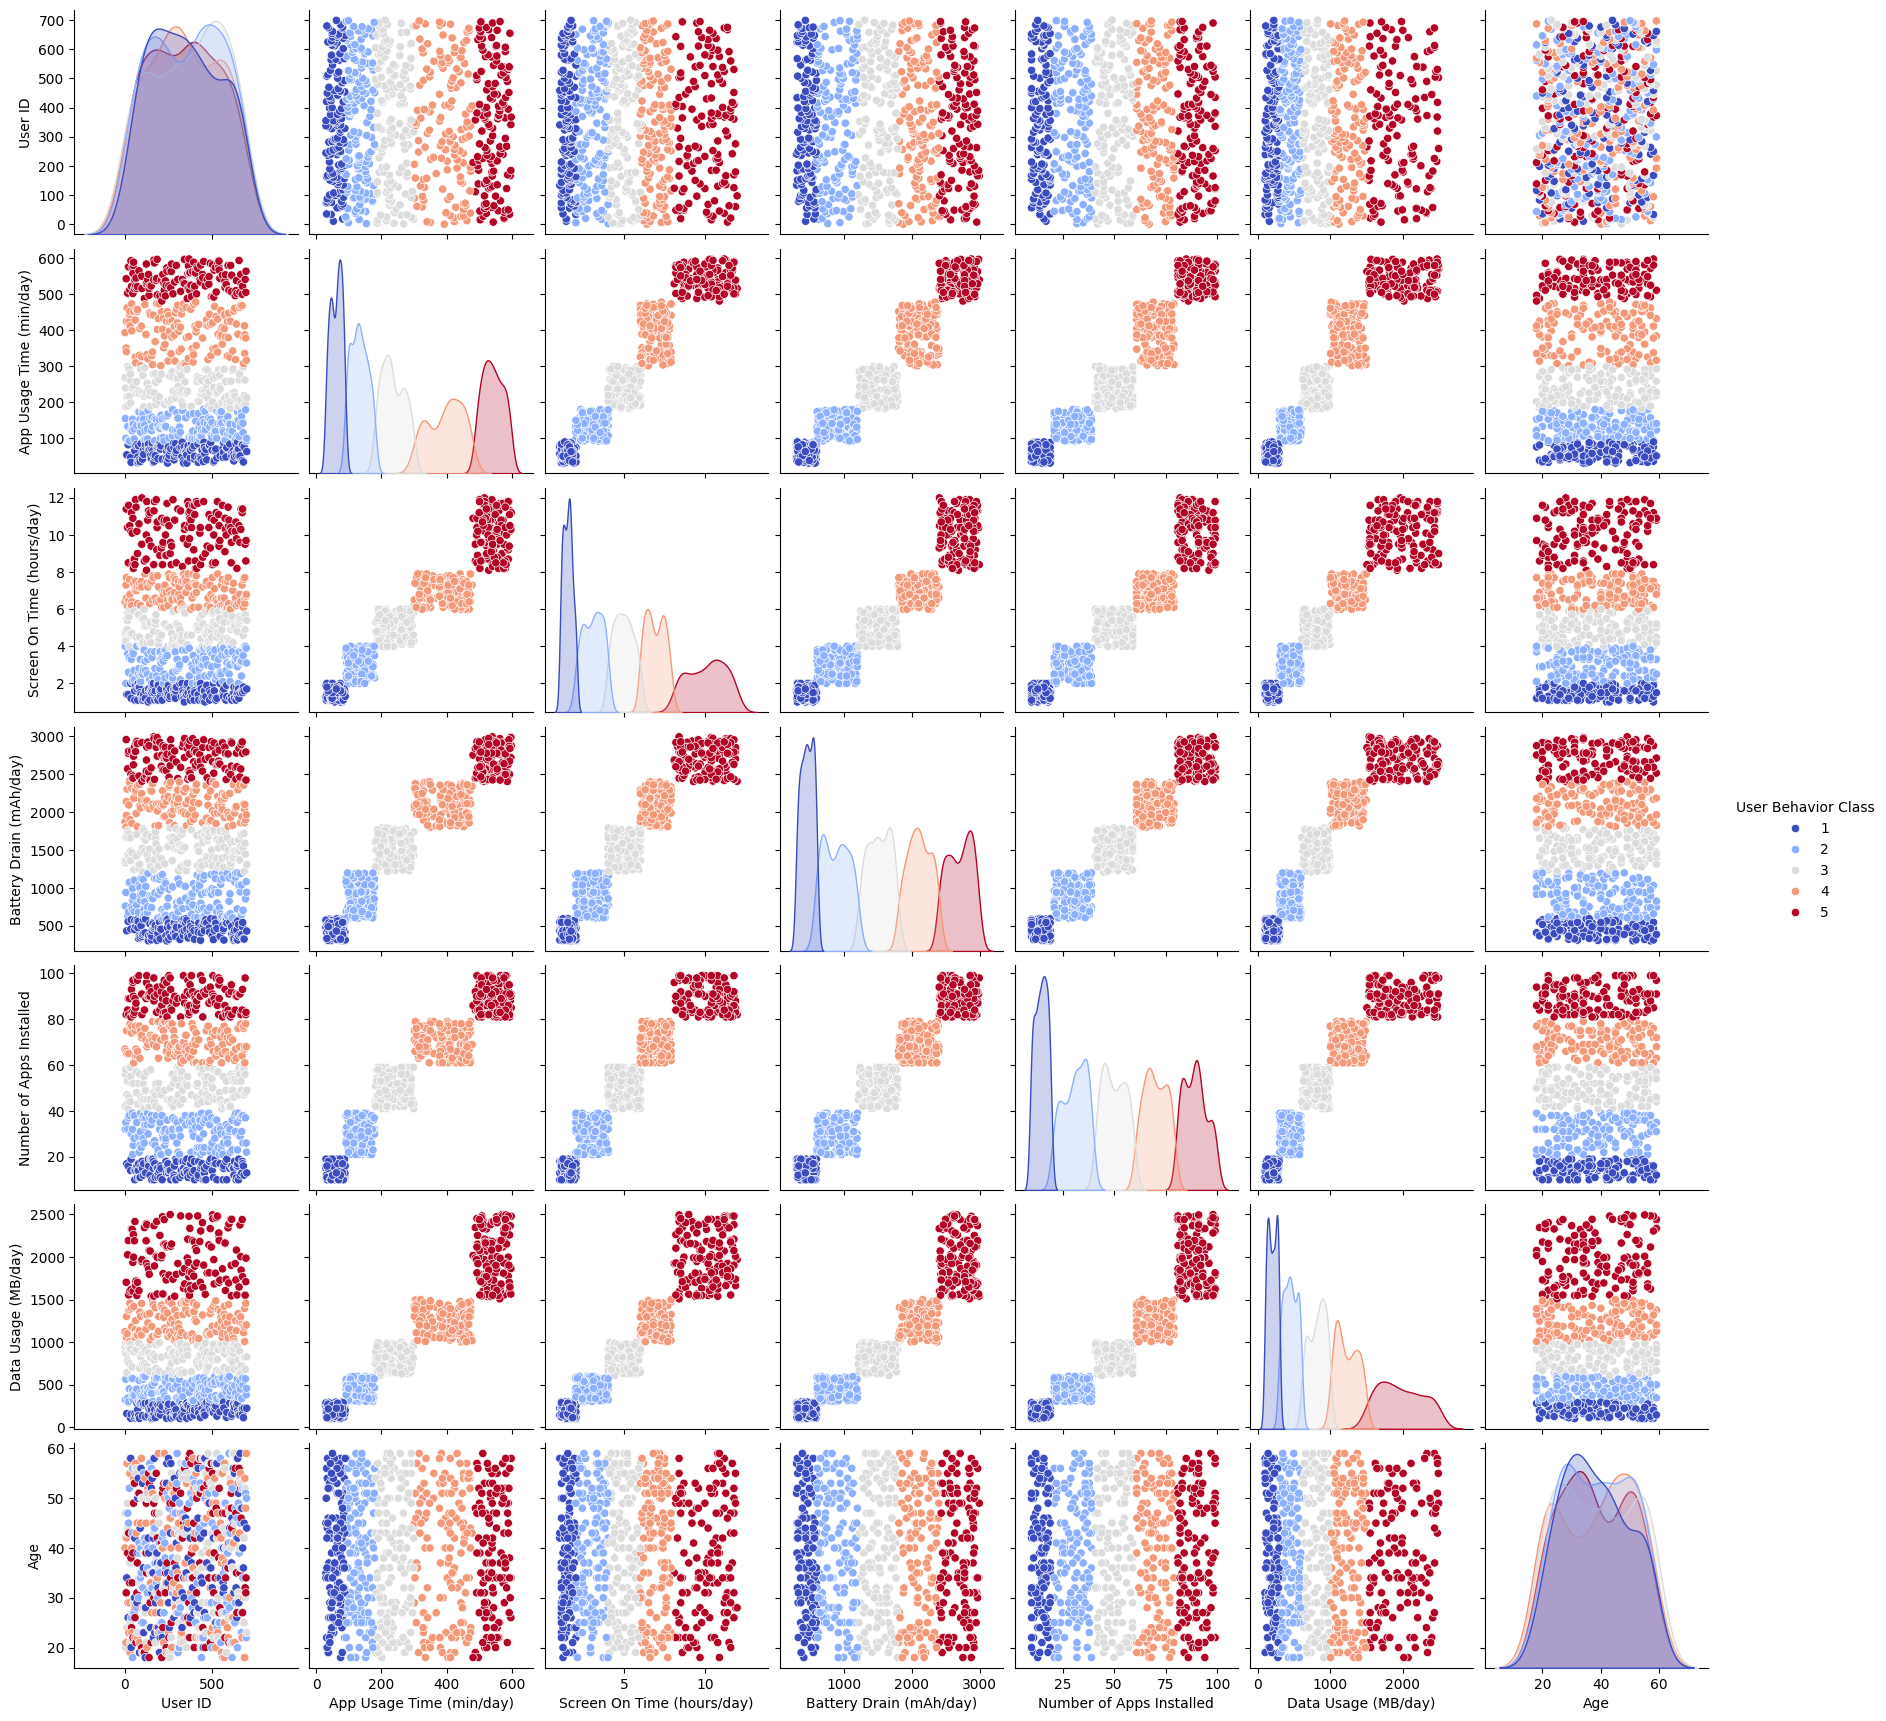

In [39]:

sns.pairplot(df, hue='User Behavior Class', palette='coolwarm')
plt.show()

Comparing different usage metrics across User Behavior Classes (1 to 5)

<ipython-input-40-1f93f51b6e2a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y=df[feature], data=df, palette='coolwarm')  # Pass a single feature
<ipython-input-40-1f93f51b6e2a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y=df[feature], data=df, palette='coolwarm')  # Pass a single feature
<ipython-input-40-1f93f51b6e2a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y=df[feature], data=df, palette='coolwarm')  # Pass a single feature
<ipython-input-40-1f93

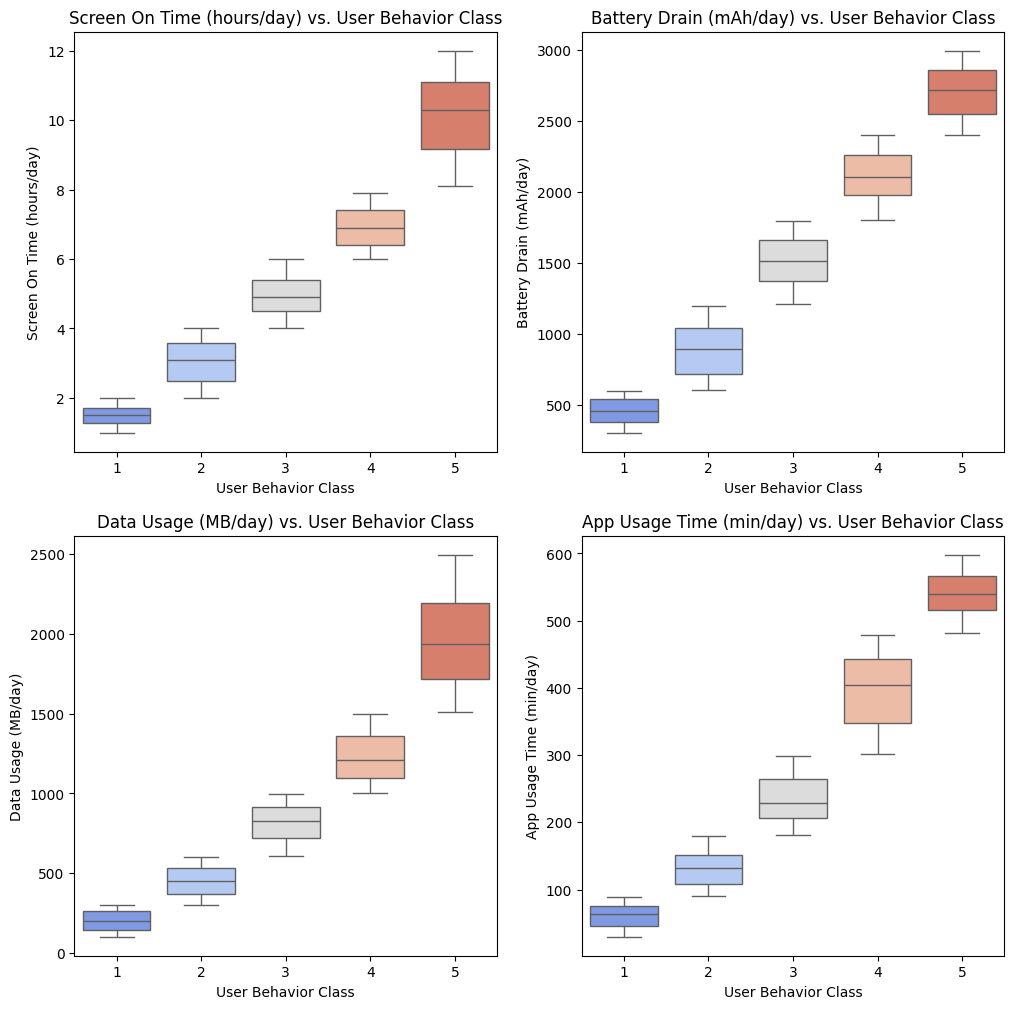

In [40]:
features = ['Screen On Time (hours/day)','Battery Drain (mAh/day)','Data Usage (MB/day)','App Usage Time (min/day)']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a subplot
    sns.boxplot(x='User Behavior Class', y=df[feature], data=df, palette='coolwarm')  # Pass a single feature
    plt.title(f"{feature} vs. User Behavior Class")
plt.show()


In [41]:
data_usage_class_device = df.groupby(['User Behavior Class', 'Device Model'])['Data Usage (MB/day)'].mean().reset_index()


Bar plot of average data usage by user behavior class

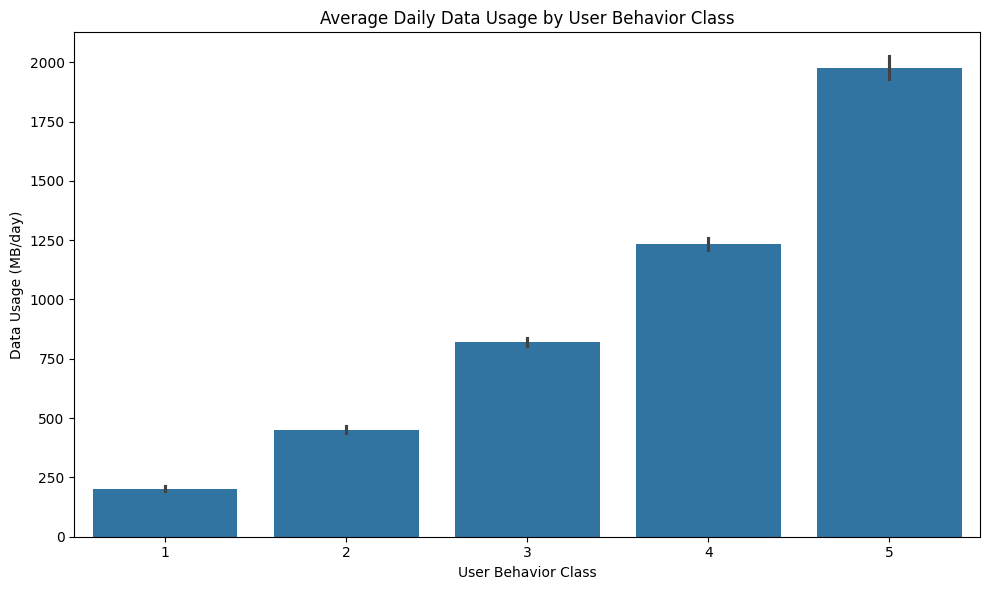

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, estimator='mean')
plt.title('Average Daily Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Bar plot of average data usage by device model

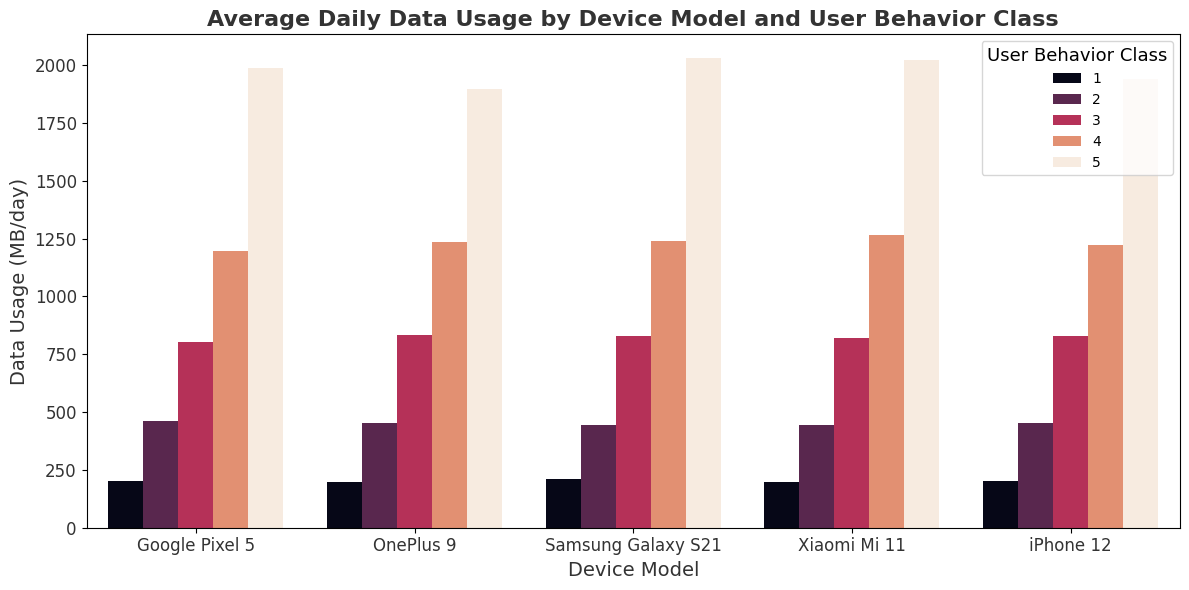

In [43]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Device Model', y='Data Usage (MB/day)', data=data_usage_class_device, hue='User Behavior Class', palette='rocket')
plt.title('Average Daily Data Usage by Device Model and User Behavior Class', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Device Model', fontsize=14, color='#333')
plt.ylabel('Data Usage (MB/day)', fontsize=14, color='#333')
plt.xticks(rotation=0, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.legend(title='User Behavior Class', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.show()
